# STOCK PRICE ESTIMATOR WITH RECOMMENDATIONS

1)The first part of this program is to predict the stock price 7 days after it's latest value

2)The second part of this program is to give a selection pick for those stocks that have a predicted growth rate of >1 

3)The final result should have the list containing the date, stock names,current market price, predicted market price, predictd growth rate and selection ; sorted by predicted growth rate

In [13]:
import numpy as np    #necessary for using arrays in the program 
import pandas as pd  #necessary for dealing with datasets
import matplotlib.pyplot as plt  #necessary  for plotting graphs 
from collections import Counter  
from collections import OrderedDict

from sklearn.preprocessing import MinMaxScaler #necessary for normalizing the data; fits it in the range of 0 to 1

from keras.models import Sequential #necessary for building the model that predicts the price 
from keras.layers import LSTM    # Using the LSTM recurrent neural network model to predict the stock price
from keras.layers import Dropout
from keras.layers import Dense 

from datetime import date 
from datetime import datetime


In [14]:
df = pd.read_csv("C:\\Users\\Siddhant\\OneDrive\\Desktop\\Data\\All_Yahoo_Prices.csv") #importing our dataset
df = df[['Date','Close','Symbol']].copy() #modifying the dataset into the date, close and symbol columns only
 

Stocklist = list(set(df['Symbol'])) #creating a list of all the stocks in the dataset

predicted_price=[]  #estimate price list that will store our predicted price data
current_price=[]   #list to store the latest/current makret price in the dataset
predicted_growth=[]  # list to store the predicted growth of the stock
stock_name=[] #list to store the stock names respective of the above data
buy_date= []   #buy date for the stock 
selection = [] #list that recommends buy or not

#### Building the Model and Estimating the price 

              Date      Close   Symbol
242018  31-05-2022  27.650000  AMJLAND
242019  01-06-2022  27.750000  AMJLAND
242020  02-06-2022  27.700001  AMJLAND
242021  03-06-2022  27.850000  AMJLAND
242022  06-06-2022  27.650000  AMJLAND
242023  07-06-2022  26.950001  AMJLAND
242024  08-06-2022  27.150000  AMJLAND
242025  09-06-2022  27.200001  AMJLAND
242026  10-06-2022  26.850000  AMJLAND
242027  13-06-2022  25.750000  AMJLAND
242028  14-06-2022  25.700001  AMJLAND
242029  15-06-2022  25.950001  AMJLAND
242030  15-06-2022  25.950001  AMJLAND
242031  16-06-2022  25.950001  AMJLAND
242032  17-06-2022  25.750000  AMJLAND
Epoch 1/25
151/151 [==============================] - 20s 103ms/step - loss: 0.0074
Epoch 2/25
151/151 [==============================] - 15s 95ms/step - loss: 0.0028
Epoch 3/25
151/151 [==============================] - 15s 100ms/step - loss: 0.0024
Epoch 4/25
151/151 [==============================] - 16s 109ms/step - loss: 0.0023
Epoch 5/25
151/151 [=====================

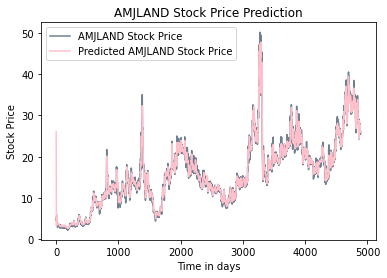

1/1 [==============================] - 2s 2s/step
              Date        Close Symbol
408294  31-05-2022  1840.750000  ASTEC
408295  01-06-2022  1846.349976  ASTEC
408296  02-06-2022  1843.849976  ASTEC
408297  03-06-2022  1832.750000  ASTEC
408298  06-06-2022  1809.699951  ASTEC
408299  07-06-2022  1746.650024  ASTEC
408300  08-06-2022  1737.449951  ASTEC
408301  09-06-2022  1750.900024  ASTEC
408302  10-06-2022  1741.849976  ASTEC
408303  13-06-2022  1748.400024  ASTEC
408304  14-06-2022  1743.099976  ASTEC
408305  15-06-2022  1753.800049  ASTEC
408306  15-06-2022  1753.800049  ASTEC
408307  16-06-2022  1750.300049  ASTEC
408308  17-06-2022  1757.750000  ASTEC
Epoch 1/25
95/95 [==============================] - 32s 219ms/step - loss: 0.0063
Epoch 2/25
95/95 [==============================] - 19s 205ms/step - loss: 0.0021
Epoch 3/25
95/95 [==============================] - 18s 187ms/step - loss: 0.0016
Epoch 4/25
95/95 [==============================] - 18s 188ms/step - loss: 0.001

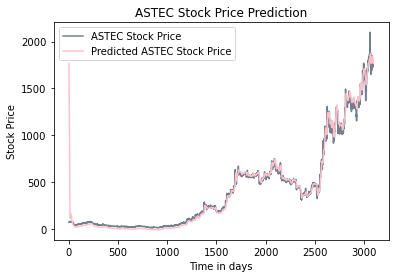

1/1 [==============================] - 1s 1s/step
              Date      Close   Symbol
325067  31-05-2022  17.600000  ARCHIES
325068  01-06-2022  17.350000  ARCHIES
325069  02-06-2022  17.500000  ARCHIES
325070  03-06-2022  17.400000  ARCHIES
325071  06-06-2022  17.400000  ARCHIES
325072  07-06-2022  17.250000  ARCHIES
325073  08-06-2022  17.150000  ARCHIES
325074  09-06-2022  17.049999  ARCHIES
325075  10-06-2022  16.900000  ARCHIES
325076  13-06-2022  16.100000  ARCHIES
325077  14-06-2022  16.049999  ARCHIES
325078  15-06-2022  16.049999  ARCHIES
325079  15-06-2022  16.049999  ARCHIES
325080  16-06-2022  15.250000  ARCHIES
325081  17-06-2022  15.100000  ARCHIES
Epoch 1/25
152/152 [==============================] - 21s 109ms/step - loss: 0.0075
Epoch 2/25
152/152 [==============================] - 15s 101ms/step - loss: 0.0033
Epoch 3/25
152/152 [==============================] - 17s 112ms/step - loss: 0.0027
Epoch 4/25
152/152 [==============================] - 17s 112ms/step - los

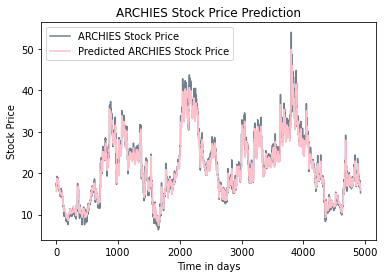

1/1 [==============================] - 2s 2s/step
              Date       Close      Symbol
862544  31-05-2022  117.650002  CAMLINFINE
862545  01-06-2022  117.500000  CAMLINFINE
862546  02-06-2022  118.599998  CAMLINFINE
862547  03-06-2022  117.599998  CAMLINFINE
862548  06-06-2022  115.750000  CAMLINFINE
862549  07-06-2022  115.750000  CAMLINFINE
862550  08-06-2022  114.400002  CAMLINFINE
862551  09-06-2022  113.349998  CAMLINFINE
862552  10-06-2022  112.800003  CAMLINFINE
862553  13-06-2022  109.900002  CAMLINFINE
862554  14-06-2022  110.349998  CAMLINFINE
862555  15-06-2022  110.800003  CAMLINFINE
862556  15-06-2022  110.800003  CAMLINFINE
862557  16-06-2022  103.949997  CAMLINFINE
862558  17-06-2022  103.550003  CAMLINFINE
Epoch 1/25
56/56 [==============================] - 21s 161ms/step - loss: 0.0162
Epoch 2/25
56/56 [==============================] - 10s 173ms/step - loss: 0.0048
Epoch 3/25
56/56 [==============================] - 11s 188ms/step - loss: 0.0041
Epoch 4/25
56/56

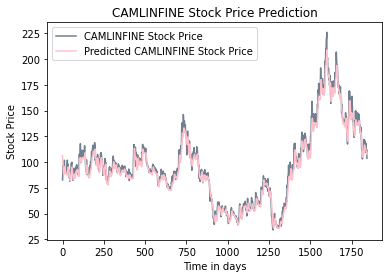

1/1 [==============================] - 3s 3s/step
              Date       Close   Symbol
976649  31-05-2022  283.750000  CHEMCON
976650  01-06-2022  288.549988  CHEMCON
976651  02-06-2022  309.049988  CHEMCON
976652  03-06-2022  300.149994  CHEMCON
976653  06-06-2022  299.000000  CHEMCON
976654  07-06-2022  298.750000  CHEMCON
976655  08-06-2022  297.299988  CHEMCON
976656  09-06-2022  302.549988  CHEMCON
976657  10-06-2022  298.299988  CHEMCON
976658  13-06-2022  285.250000  CHEMCON
976659  14-06-2022  276.100006  CHEMCON
976660  15-06-2022  281.200012  CHEMCON
976661  15-06-2022  281.200012  CHEMCON
976662  16-06-2022  275.799988  CHEMCON
976663  17-06-2022  276.049988  CHEMCON
Epoch 1/25
12/12 [==============================] - 14s 179ms/step - loss: 0.0870
Epoch 2/25
12/12 [==============================] - 2s 177ms/step - loss: 0.0234
Epoch 3/25
12/12 [==============================] - 2s 181ms/step - loss: 0.0140
Epoch 4/25
12/12 [==============================] - 2s 167ms/step 

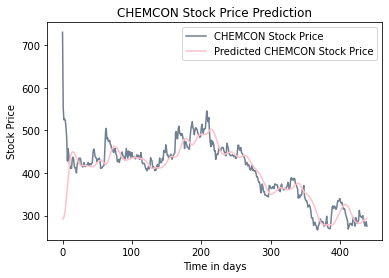

1/1 [==============================] - 3s 3s/step
              Date      Close  Symbol
148279  31-05-2022  56.049999  AJOONI
148280  01-06-2022  56.349998  AJOONI
148281  02-06-2022  54.200001  AJOONI
148282  03-06-2022  55.000000  AJOONI
148283  06-06-2022  52.000000  AJOONI
148284  07-06-2022  50.950001  AJOONI
148285  08-06-2022  51.099998  AJOONI
148286  09-06-2022  51.799999  AJOONI
148287  10-06-2022  51.150002  AJOONI
148288  13-06-2022  48.950001  AJOONI
148289  14-06-2022  50.200001  AJOONI
148290  15-06-2022  48.700001  AJOONI
148291  15-06-2022  48.700001  AJOONI
148292  16-06-2022  46.500000  AJOONI
148293  17-06-2022  45.849998  AJOONI
Epoch 1/25
21/21 [==============================] - 15s 165ms/step - loss: 0.0422
Epoch 2/25
21/21 [==============================] - 3s 149ms/step - loss: 0.0090
Epoch 3/25
21/21 [==============================] - 3s 144ms/step - loss: 0.0071
Epoch 4/25
21/21 [==============================] - 3s 129ms/step - loss: 0.0064
Epoch 5/25
21/21 

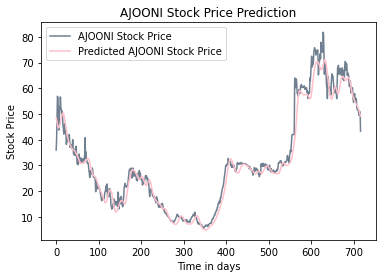

1/1 [==============================] - 2s 2s/step
             Date       Close Symbol
74698  31-05-2022  198.500000    ACE
74699  01-06-2022  206.800003    ACE
74700  02-06-2022  206.899994    ACE
74701  03-06-2022  216.399994    ACE
74702  06-06-2022  215.550003    ACE
74703  07-06-2022  216.899994    ACE
74704  08-06-2022  221.850006    ACE
74705  09-06-2022  216.899994    ACE
74706  10-06-2022  210.449997    ACE
74707  13-06-2022  201.550003    ACE
74708  14-06-2022  206.149994    ACE
74709  15-06-2022  209.199997    ACE
74710  15-06-2022  209.199997    ACE
74711  16-06-2022  208.899994    ACE
74712  17-06-2022  210.250000    ACE
Epoch 1/25
120/120 [==============================] - 32s 182ms/step - loss: 0.0073
Epoch 2/25
120/120 [==============================] - 22s 186ms/step - loss: 0.0022
Epoch 3/25
120/120 [==============================] - 22s 183ms/step - loss: 0.0021
Epoch 4/25
120/120 [==============================] - 22s 183ms/step - loss: 0.0018
Epoch 5/25
120/120 [==

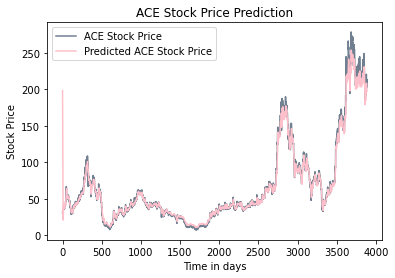

1/1 [==============================] - 3s 3s/step
              Date       Close      Symbol
488763  31-05-2022  356.519989  AXISBNKETF
488764  01-06-2022  357.369995  AXISBNKETF
488765  02-06-2022  358.000000  AXISBNKETF
488766  03-06-2022  355.100006  AXISBNKETF
488767  06-06-2022  355.410004  AXISBNKETF
488768  07-06-2022  350.309998  AXISBNKETF
488769  08-06-2022  350.399994  AXISBNKETF
488770  09-06-2022  352.190002  AXISBNKETF
488771  10-06-2022  347.220001  AXISBNKETF
488772  13-06-2022  335.220001  AXISBNKETF
488773  14-06-2022  334.959992  AXISBNKETF
488774  15-06-2022  335.649994  AXISBNKETF
488775  15-06-2022  335.649994  AXISBNKETF
488776  16-06-2022  329.109985  AXISBNKETF
488777  17-06-2022  330.109985  AXISBNKETF
Epoch 1/25
11/11 [==============================] - 13s 148ms/step - loss: 0.1814
Epoch 2/25
11/11 [==============================] - 2s 171ms/step - loss: 0.0272
Epoch 3/25
11/11 [==============================] - 2s 151ms/step - loss: 0.0190
Epoch 4/25
11/11 [

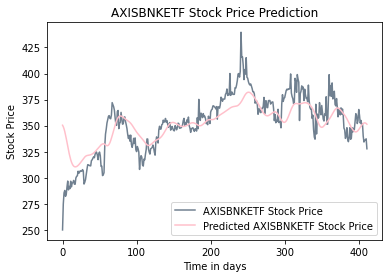

1/1 [==============================] - 1s 1s/step
             Date  Close  Symbol
16346  31-05-2022  14.60  3PLAND
16347  01-06-2022  14.65  3PLAND
16348  02-06-2022  14.30  3PLAND
16349  03-06-2022  13.80  3PLAND
16350  06-06-2022  14.45  3PLAND
16351  07-06-2022  14.80  3PLAND
16352  08-06-2022  14.10  3PLAND
16353  09-06-2022  13.60  3PLAND
16354  10-06-2022  14.25  3PLAND
16355  13-06-2022  14.30  3PLAND
16356  14-06-2022  14.40  3PLAND
16357  15-06-2022  13.80  3PLAND
16358  15-06-2022  13.80  3PLAND
16359  16-06-2022  14.10  3PLAND
16360  17-06-2022  14.40  3PLAND
Epoch 1/25
88/88 [==============================] - 23s 174ms/step - loss: 0.0081
Epoch 2/25
88/88 [==============================] - 16s 179ms/step - loss: 0.0038
Epoch 3/25
88/88 [==============================] - 16s 186ms/step - loss: 0.0035
Epoch 4/25
88/88 [==============================] - 17s 189ms/step - loss: 0.0036
Epoch 5/25
88/88 [==============================] - 17s 191ms/step - loss: 0.0029
Epoch 6/25
8

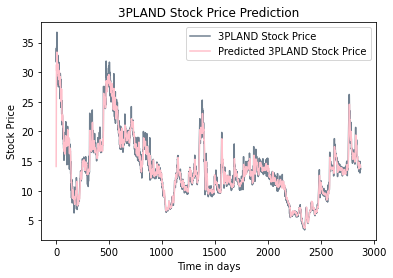

1/1 [==============================] - 2s 2s/step
              Date       Close      Symbol
291769  31-05-2022  605.603088  APCOTEXIND
291770  01-06-2022  648.000244  APCOTEXIND
291771  02-06-2022  646.606934  APCOTEXIND
291772  03-06-2022  627.150024  APCOTEXIND
291773  06-06-2022  633.150024  APCOTEXIND
291774  07-06-2022  619.950012  APCOTEXIND
291775  08-06-2022  605.799988  APCOTEXIND
291776  09-06-2022  620.500000  APCOTEXIND
291777  10-06-2022  630.750000  APCOTEXIND
291778  13-06-2022  616.549988  APCOTEXIND
291779  14-06-2022  605.500000  APCOTEXIND
291780  15-06-2022  600.299988  APCOTEXIND
291781  15-06-2022  600.299988  APCOTEXIND
291782  16-06-2022  580.500000  APCOTEXIND
291783  17-06-2022  586.000000  APCOTEXIND
Epoch 1/25
152/152 [==============================] - 37s 175ms/step - loss: 0.0026
Epoch 2/25
152/152 [==============================] - 25s 164ms/step - loss: 9.3901e-04
Epoch 3/25
152/152 [==============================] - 30s 196ms/step - loss: 9.7638e-04
Ep

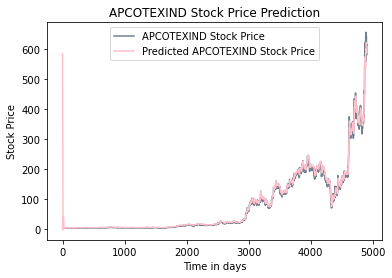

1/1 [==============================] - 1s 1s/step


In [15]:
def estimate(S):
    
    df1=df.loc[df['Symbol']==S] #getting the data for a particular stock
    print(df1.tail(15))
    num= len(df1.axes[0]) #number of days of data available 
    
    latest_date = df1.Date.iat[-1]
    
    training_set = df1.iloc[:, 1:2].values  #using the closing price values and initializing them to the training set
   
    sc = MinMaxScaler(feature_range=(0,1)) #fits the closing price values in the range of 0 to 1
    scaled_training_set = sc.fit_transform(training_set) #normalizing data using minmaxscaler
    
    X_train = [] 
    y_train =[]
    prediction_days=60 # number of days of data we will use to predict the value (can be changed )
    
    for i in range(prediction_days,num):
        X_train.append(scaled_training_set[i-60:i, 0])
        y_train.append(scaled_training_set[i, 0])
    
    X_train, y_train = np.array(X_train), np.array(y_train) 
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #makig x and y trains and preparing them to fit the LSTM model
   
    #Building the model 
    model = Sequential ()
    
    model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1)) #prediction of the closing value
    
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=25,batch_size=32) #compiling the values and using the adam optimizer to optimize data
    
    #The epoch can be adjusted to more or less for better accuracy 
    
    #TESTING THE MODEL
    
    dataset_test = pd.read_csv("C:\\Users\\Siddhant\\OneDrive\\Desktop\\Data\\All_Yahoo_Prices.csv")
    dataset_test=dataset_test.loc[dataset_test['Symbol'] == S]
    real_stock_price = dataset_test.iloc[:, 1:2].values #taking the actual stock prices 
    dataset_total = pd.concat((df1['Close'], dataset_test['Close']), axis = 0) 
    
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values 
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    
    #Making predictions on test data
    X_test = []
    for i in range(prediction_days,len(inputs)):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    predicted_stock_price = model.predict(X_test)  #predicting the stock price using test values to check for accuracy
    predicted_stock_price = sc.inverse_transform(predicted_stock_price) #inverse transforming our final value
    
    #plotting the test predictions; gives us an idea of how accurately we predited the past values 
    plt.plot(real_stock_price, color = 'slategrey', label = S + ' Stock Price')
    plt.plot(predicted_stock_price, color = 'pink', label = 'Predicted '+ S +' Stock Price')
    plt.title(S +' Stock Price Prediction')
    plt.xlabel('Time in days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    #Predicting the value of the stock after 7 days
  
    real_data= [inputs[len(inputs)+7- prediction_days:len(inputs+7),0]]
    real_data= np.array(real_data)
    real_data= np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
    predicted_value=model.predict(real_data)
    predicted_value= sc.inverse_transform(predicted_value)
    return predicted_value #returning final predicted stock price after day1+7 days 
 
    # Calling the estimate function and making lists of all the necessary data elements 
c=0
for i in range (20,30): 

    df_new=df.loc[df['Symbol']==Stocklist[i]]
    
    if (len(df)<60):
        continue
        
    x=estimate(Stocklist[i]) #calling the estimate function by sending the stock name as argument 
    predicted_price.append(x) #adding the estimated prices in a list 
    current_price.append(df_new.Close.iat[-1]) #current value list 
    buy_date.append(df_new.Date.iat[-1])
    
    predicted_growth.append(predicted_price[c] / current_price[c])
    
    if ((predicted_price[c] / current_price[c])>1):
        pick = 'Yes'
    else:
        pick = 'No'
    
    selection.append(pick)
    stock_name.append(Stocklist[i])
    c=c+1
    

# The loop can run for all the stocks in the dataset ; for that use "for i in range(0,len(Stocklist)-1):""

In [16]:
result=list(zip(buy_date,stock_name,current_price,predicted_price,predicted_growth,selection)) 
data=df = pd.DataFrame(result, columns=['Buy Date',' Stock Name ','Current Market Price','Predicted Price for next week','Predicted Growth','Pick'])
final_data= data.sort_values(by = 'Predicted Growth',ascending = False)
print (final_data)




     Buy Date  Stock Name   Current Market Price  \
7  17-06-2022   AXISBNKETF            330.109985   
5  17-06-2022       AJOONI             45.849998   
4  17-06-2022      CHEMCON            276.049988   
3  17-06-2022   CAMLINFINE            103.550003   
2  17-06-2022      ARCHIES             15.100000   
0  17-06-2022      AMJLAND             25.750000   
1  17-06-2022        ASTEC           1757.750000   
9  17-06-2022   APCOTEXIND            586.000000   
8  17-06-2022       3PLAND             14.400000   
6  17-06-2022          ACE            210.250000   

  Predicted Price for next week Predicted Growth Pick  
7                 [[350.35617]]    [[1.0613316]]  Yes  
5                  [[48.50657]]    [[1.0579405]]  Yes  
4                  [[291.8197]]    [[1.0571263]]  Yes  
3                 [[106.41367]]     [[1.027655]]  Yes  
2                 [[15.512463]]    [[1.0273154]]  Yes  
0                 [[26.030634]]    [[1.0108984]]  Yes  
1                 [[1766.8654]]    